## TRIP FARE

### Data Collection

In [1]:
import pandas as pd
import numpy as np


In [137]:
data = pd.read_csv("taxi_fare.csv")

In [153]:
original_data = data.copy() #Backup copy
# data['tpep_pickup_datetime'] = original_data['tpep_pickup_datetime']
# data['tpep_dropoff_datetime'] = original_data['tpep_dropoff_datetime']

### Data Understanding

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               212345 non-null  int64  
 1   tpep_pickup_datetime   212345 non-null  object 
 2   tpep_dropoff_datetime  212345 non-null  object 
 3   passenger_count        212345 non-null  int64  
 4   pickup_longitude       212345 non-null  float64
 5   pickup_latitude        212345 non-null  float64
 6   RatecodeID             212345 non-null  int64  
 7   store_and_fwd_flag     212345 non-null  object 
 8   dropoff_longitude      212345 non-null  float64
 9   dropoff_latitude       212345 non-null  float64
 10  payment_type           212345 non-null  int64  
 11  fare_amount            212345 non-null  float64
 12  extra                  212345 non-null  float64
 13  mta_tax                212345 non-null  float64
 14  tip_amount             212345 non-nu

In [8]:
data.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [10]:
data.shape

(212345, 18)

In [12]:
data.describe()

,VendorID,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000
mean,1.708338,1.766493,-73.112122,40.279405,1.034152,-73.144178,40.295648,1.324943,12.665588,0.048077,0.497662,1.809357,0.329049,0.299637,15.649355
std,0.454529,1.469647,7.936633,4.370714,0.494699,7.794599,4.293031,0.478255,10.875584,0.148103,0.037436,2.507419,2.028199,0.014094,13.592129
min,1.000000,0.000000,-121.933327,0.000000,1.000000,-121.933327,0.000000,1.000000,-52.000000,-0.500000,-0.500000,-2.700000,0.000000,-0.300000,-52.800000
25%,1.000000,1.000000,-73.990891,40.740292,1.000000,-73.990570,40.740089,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000
50%,2.000000,1.000000,-73.979469,40.755989,1.000000,-73.978691,40.755508,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.620000
75%,2.000000,2.000000,-73.963295,40.770283,1.000000,-73.964645,40.767475,2.000000,14.500000,0.000000,0.500000,2.360000,0.000000,0.300000,17.160000
max,2.000000,6.000000,0.000000,42.786934,99.000000,0.000000,42.786934,4.000000,819.500000,4.500000,0.500000,218.950000,661.080000,0.300000,832.800000


In [14]:
data.nunique()

VendorID                     2
tpep_pickup_datetime     61208
tpep_dropoff_datetime    63607
passenger_count              7
pickup_longitude         14794
pickup_latitude          30504
RatecodeID                   7
store_and_fwd_flag           2
dropoff_longitude        18029
dropoff_latitude         34903
payment_type                 4
fare_amount                341
extra                        5
mta_tax                      3
tip_amount                1224
tolls_amount               109
improvement_surcharge        3
total_amount              2727
dtype: int64

In [16]:
data.isnull().sum().sort_values(ascending = False).reset_index()

,index,0
0,VendorID,0
1,tpep_pickup_datetime,0
2,improvement_surcharge,0
3,tolls_amount,0
4,tip_amount,0
5,mta_tax,0
6,extra,0
7,fare_amount,0
8,payment_type,0
9,dropoff_latitude,0


In [20]:
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount'],
      dtype='object')

In [183]:
for col in data.columns:
  print(f"{col}:\n Unique values:",data[col].nunique(),"\n", data[col].unique()[:10])
  print()     

VendorID:
 Unique values: 2 
 [1 2]

tpep_pickup_datetime:
 Unique values: 61208 
 <DatetimeArray>
['2016-03-01 00:00:00', '2016-03-01 00:00:01', '2016-03-01 00:00:02',
 '2016-03-01 00:00:03', '2016-03-01 00:00:04', '2016-03-01 00:00:05',
 '2016-03-01 00:00:06', '2016-03-01 00:00:07', '2016-03-01 00:00:08',
 '2016-03-01 00:00:09']
Length: 10, dtype: datetime64[ns]

tpep_dropoff_datetime:
 Unique values: 63607 
 <DatetimeArray>
['2016-03-01 00:07:55', '2016-03-01 00:11:06', '2016-03-01 00:31:06',
 '2016-03-01 00:00:00', '2016-03-01 00:16:04', '2016-03-01 00:05:00',
 '2016-03-01 00:24:06', '2016-03-01 00:02:03', '2016-03-01 00:07:49',
 '2016-03-01 00:03:05']
Length: 10, dtype: datetime64[ns]

passenger_count:
 Unique values: 7 
 [1 2 3 5 6 4 0]

pickup_longitude:
 Unique values: 14794 
 [-73.97674561 -73.98348236 -73.78202057 -73.86341858 -73.97174072
 -74.01719666 -73.99458313 -73.78877258 -73.95822144 -73.98577881]

pickup_latitude:
 Unique values: 30504 
 [40.76515198 40.76792526 40.6

In [18]:
data.duplicated().sum()

0

In [24]:
# Convert object to numeric values to check correlation

In [149]:
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

In [28]:
data['pickup_unix'] = data['tpep_pickup_datetime'].astype(np.int64) // 10**9
data['dropoff_unix'] = data['tpep_dropoff_datetime'].astype(np.int64) // 10**9

In [92]:
data.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1, inplace=True)

KeyError: "['tpep_pickup_datetime', 'tpep_dropoff_datetime'] not found in axis"

In [116]:
data['pickup_unix']

0         1456790400
1         1456790400
2         1456790400
3         1456790400
4         1456790400
             ...    
212340    1456834537
212341    1456834537
212342    1456834537
212343    1456834538
212344    1456834538
Name: pickup_unix, Length: 212345, dtype: int64

In [ ]:
data['dropoff_unix']

In [ ]:
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].map({'N': 0, 'Y': 1})


In [ ]:
data['store_and_fwd_flag'].unique()

In [100]:
corr = data.corr()

In [102]:
corr

,VendorID,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_unix,dropoff_unix
VendorID,1.000000,0.277572,-0.042623,0.042664,-0.004814,-0.087084,-0.039628,0.039537,-0.016623,0.023872,-0.146590,0.001298,0.022589,0.012008,-0.015428,0.023449,0.508017,0.508166
passenger_count,0.277572,1.000000,-0.013427,0.013450,-0.008276,-0.022932,-0.011958,0.011919,-0.000369,0.005970,-0.032630,0.005184,0.002656,0.003396,-0.003479,0.005430,0.143026,0.143076
pickup_longitude,-0.042623,-0.013427,1.000000,-0.999472,0.037302,0.009008,0.887973,-0.887578,0.009952,0.010948,0.002951,-0.038987,0.003021,-0.004113,-0.021542,0.008604,-0.028167,-0.028240
pickup_latitude,0.042664,0.013450,-0.999472,1.000000,-0.037322,-0.008970,-0.887719,0.888033,-0.009711,-0.010219,-0.003564,0.039008,-0.002514,0.004969,0.021518,-0.007806,0.028204,0.028278
RatecodeID,-0.004814,-0.008276,0.037302,-0.037322,1.000000,0.059371,0.054062,-0.054275,-0.008808,0.266776,-0.016979,-0.301218,0.159901,0.154504,-0.068736,0.264924,0.000077,0.000386
store_and_fwd_flag,-0.087084,-0.022932,0.009008,-0.008970,0.059371,1.000000,0.015790,-0.015768,0.008699,0.022561,0.011542,-0.008930,0.010945,0.019160,-0.003959,0.023028,-0.044155,-0.044220
dropoff_longitude,-0.039628,-0.011958,0.887973,-0.887719,0.054062,0.015790,1.000000,-0.999614,0.017301,0.011934,0.003334,-0.032707,0.000511,-0.000690,-0.021086,0.009462,-0.026849,-0.026871
dropoff_latitude,0.039537,0.011919,-0.887578,0.888033,-0.054275,-0.015768,-0.999614,1.000000,-0.016784,-0.011865,-0.003198,0.033675,-0.000788,0.000805,0.021048,-0.009437,0.026715,0.026737
payment_type,-0.016623,-0.000369,0.009952,-0.009711,-0.008808,0.008699,0.017301,-0.016784,1.000000,-0.077147,0.058785,-0.050546,-0.490224,-0.036838,-0.091486,-0.157255,-0.009164,-0.009252
fare_amount,0.023872,0.005970,0.010948,-0.010219,0.266776,0.022561,0.011934,-0.011865,-0.077147,1.000000,0.004653,-0.200802,0.601308,0.449035,0.037361,0.977607,0.030373,0.031818


In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

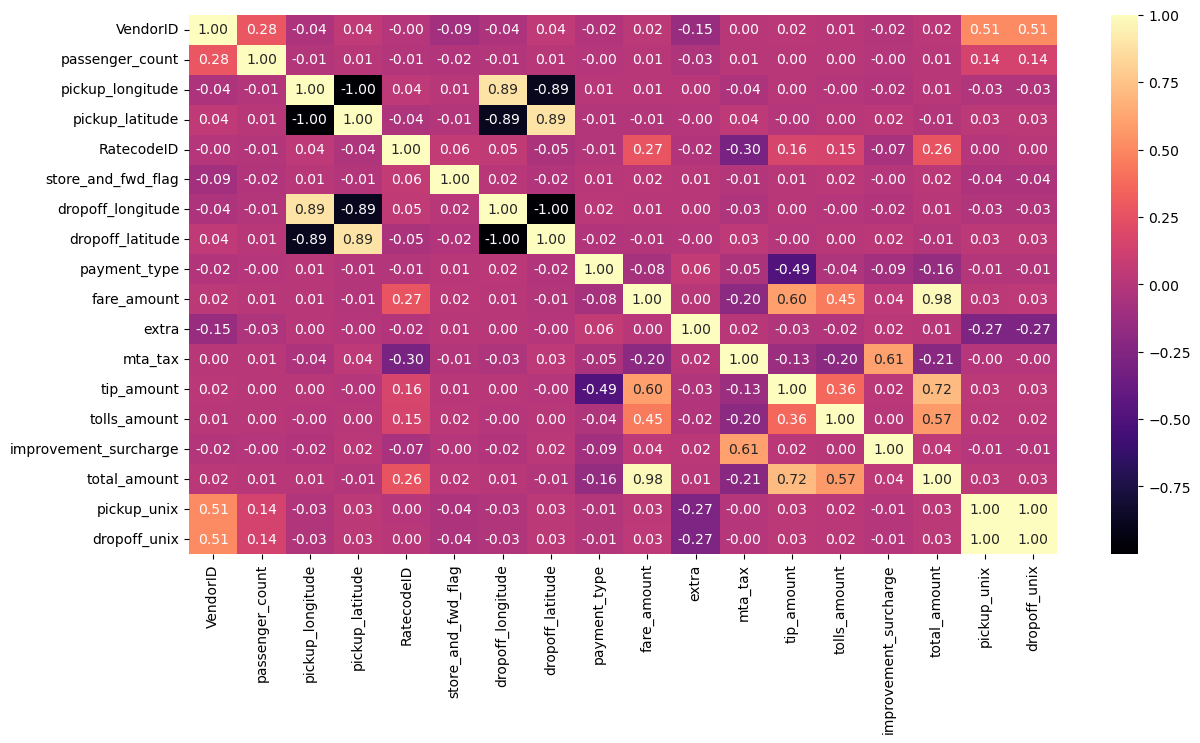

In [108]:
plt.figure(figsize = (14,7))
sns.heatmap(corr, fmt=".2f", cmap = 'magma', annot = True)
plt.show()

## Feature Engineering

In [ ]:
# Haversine formula to calculate trip_distance

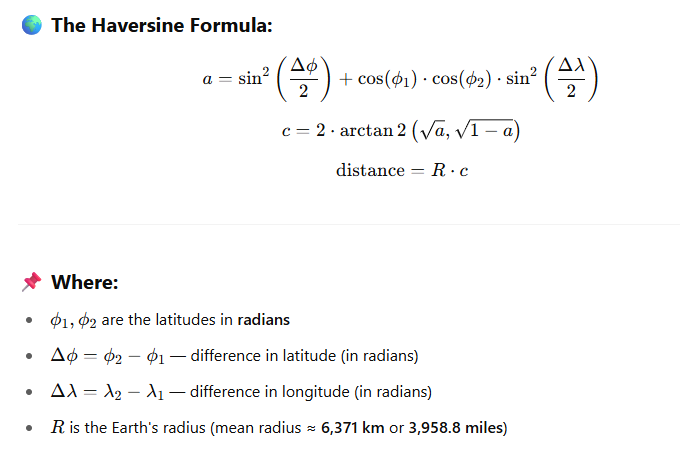


In [279]:
import numpy as np

def haversine(lon1, lat1, lon2, lat2):
    R = 6371  # km
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon, dlat = lon2 - lon1, lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    return R * 2 * np.arcsin(np.sqrt(a))

original_data['trip_distance'] = haversine(original_data['pickup_longitude'], original_data['pickup_latitude'],
                                 original_data['dropoff_longitude'], original_data['dropoff_latitude'])


In [518]:
original_data['trip_distance'].nunique()

209241

In [524]:
# pickup day (0 = Monday, 6 = Sunday)

original_data['pickup_day'] = original_data['tpep_pickup_datetime'].dt.dayofweek


In [536]:
original_data['pickup_day'].unique()

array([0, 3, 1])

In [528]:
# is_weekend (5= sat; 6 = Sun)

original_data['is_weekend'] = original_data['pickup_day'].apply(lambda x: 1 if x >= 5 else 0)


In [530]:
original_data['is_weekend'].unique()

array([0], dtype=int64)

In [229]:
# pickup_hour ; am/pm ; is_night

original_data['pickup_hour'] = original_data['tpep_pickup_datetime'].dt.hour
original_data['am_pm'] = original_data['pickup_hour'].apply(lambda x: 'AM' if x < 12 else 'PM')
original_data['is_night'] = original_data['pickup_hour'].apply(lambda x: 1 if x <= 5 or x >= 22 else 0)


In [231]:
original_data['pickup_hour'].unique()

array([19,  2,  3,  4,  5,  6,  7,  8, 20, 21, 22, 23,  0,  1,  9])

In [233]:
original_data['am_pm'].unique()

array(['PM', 'AM'], dtype=object)

In [235]:
original_data['is_night'].unique()

array([0, 1], dtype=int64)

In [237]:
# is_rush_hour

original_data['is_rush_hour'] = original_data['pickup_hour'].apply(lambda x: 1 if 7 <= x <= 10 or 16 <= x <= 19 else 0)


In [239]:
original_data['is_rush_hour'].unique()

array([1, 0], dtype=int64)

In [323]:
#convert pickuptime from UTC to EDT
# tz_localize('UTC'): Marks that the time is in UTC
# tz_convert('US/Eastern'): Converts to Eastern Time Zone.
import pytz

original_data['tpep_pickup_datetime'] = original_data['tpep_pickup_datetime'].dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
original_data['tpep_dropoff_datetime'] = original_data['tpep_dropoff_datetime'].dt.tz_localize('UTC').dt.tz_convert('US/Eastern')


TypeError: Already tz-aware, use tz_convert to convert.

In [255]:
original_data['tpep_pickup_datetime']

0        2016-02-29 19:00:00-05:00
1        2016-02-29 19:00:00-05:00
2        2016-02-29 19:00:00-05:00
3        2016-02-29 19:00:00-05:00
4        2016-02-29 19:00:00-05:00
                    ...           
212340   2016-03-01 07:15:37-05:00
212341   2016-03-01 07:15:37-05:00
212342   2016-03-01 07:15:37-05:00
212343   2016-03-01 07:15:38-05:00
212344   2016-03-01 07:15:38-05:00
Name: tpep_pickup_datetime, Length: 212345, dtype: datetime64[ns, US/Eastern]

In [417]:
# trip_duration (in minutes)

original_data['trip_duration'] = (original_data['tpep_dropoff_datetime'] - original_data['tpep_pickup_datetime']).dt.total_seconds() / 60

In [419]:
original_data['trip_duration'].unique()[:50]

array([ 7.91666667, 11.1       , 31.1       ,  0.        , 16.05      ,
        4.98333333, 24.08333333,  2.03333333,  7.78333333,  3.05      ,
        9.5       , 24.15      ,  8.36666667,  9.33333333,  8.51666667,
       32.7       ,  3.43333333,  6.11666667, 19.58333333,  2.33333333,
        2.75      , 14.83333333, 12.08333333, 31.08333333,  7.03333333,
       36.73333333,  3.23333333, 26.16666667, 16.38333333, 10.        ,
        9.85      , 10.9       ,  4.46666667, 13.63333333,  8.48333333,
       29.75      ,  4.71666667,  2.48333333, 21.73333333, 11.        ,
        9.61666667, 11.71666667,  3.66666667,  4.36666667, 11.75      ,
       25.28333333, 12.76666667,  9.56666667, 17.71666667, 17.8       ])

In [421]:
# Fare_per_km

original_data['fare_per_km'] = original_data['fare_amount'] / (original_data['trip_distance'] + 1e-3)

In [423]:
original_data['fare_per_km'].value_counts().sort_values(ascending=True)

fare_per_km
4.571634         1
2.674492         1
2.211347         1
5.389548         1
2.416416         1
              ... 
4500.000000    129
6500.000000    133
5000.000000    140
5500.000000    149
2500.000000    173
Name: count, Length: 209475, dtype: int64

In [425]:
# tip percent

original_data['tip_percent'] = (original_data['tip_amount'] / (original_data['fare_amount'] + 1e-5)) * 100


In [427]:
original_data['tip_percent'].unique()

array([22.77775247, 27.72724752, 14.67889639, ..., 17.07316865,
       37.96459505, 22.57731493])

In [542]:
original_data.drop(['pickup_day_num', 'avg_speed_kmph'], axis=1, inplace=True)

In [544]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype                     
---  ------                 --------------   -----                     
 0   VendorID               212345 non-null  int64                     
 1   tpep_pickup_datetime   212345 non-null  datetime64[ns, US/Eastern]
 2   tpep_dropoff_datetime  212345 non-null  datetime64[ns, US/Eastern]
 3   passenger_count        212345 non-null  int64                     
 4   pickup_longitude       212345 non-null  float64                   
 5   pickup_latitude        212345 non-null  float64                   
 6   RatecodeID             212345 non-null  int64                     
 7   store_and_fwd_flag     212345 non-null  object                    
 8   dropoff_longitude      212345 non-null  float64                   
 9   dropoff_latitude       212345 non-null  float64                   
 10  payment_type        

# Exploratory Data Analysis (EDA)

In [436]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [448]:
# 1. Fare Amount vs Trip Distance

# Bivariate Analysis

original_data[['fare_amount','trip_distance']].reset_index()


,index,fare_amount,trip_distance
0,0,9.0,3.138096
1,1,11.0,4.303331
2,2,54.5,16.600142
3,3,31.5,9.046547
4,4,98.0,20.400022
...,...,...,...
212340,212340,16.0,3.806279
212341,212341,15.5,3.496576
212342,212342,4.0,0.580119
212343,212343,7.0,1.555737


In [450]:
bi_corr = original_data[['fare_amount','trip_distance']].corr()

In [452]:
bi_corr

,fare_amount,trip_distance
fare_amount,1.000000,0.029481
trip_distance,0.029481,1.000000


<Axes: >

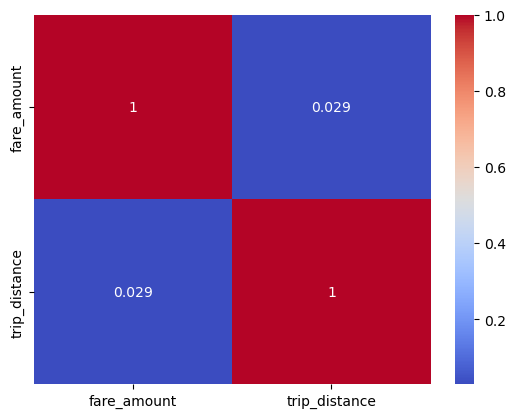

In [454]:
sns.heatmap(bi_corr, cmap= 'coolwarm', annot= True)

C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


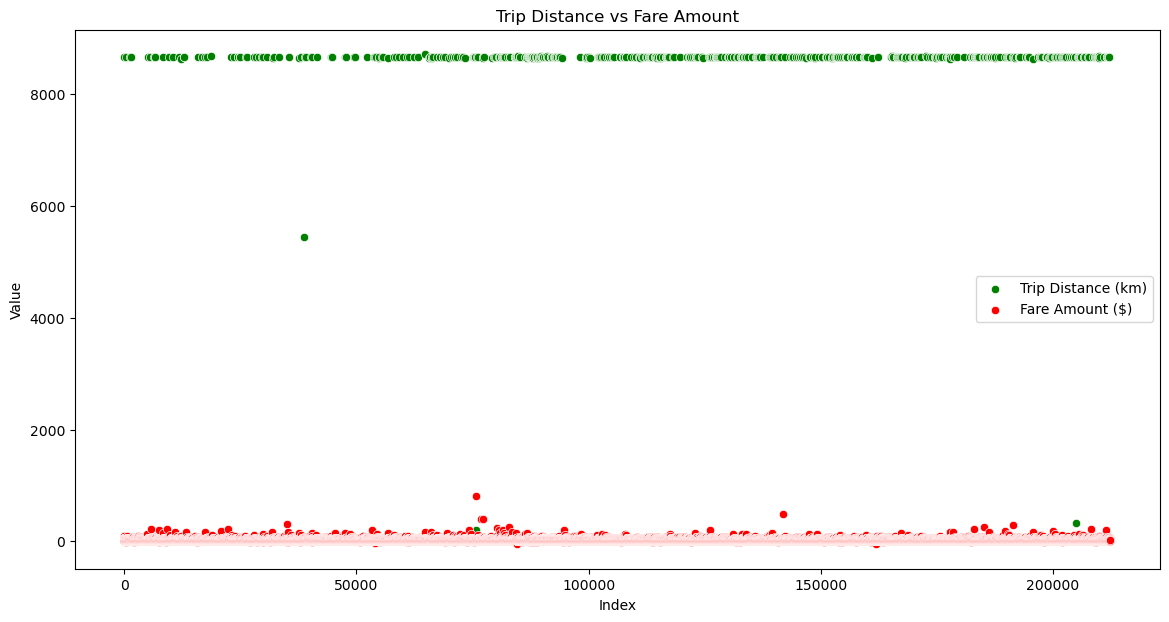

In [472]:
plt.figure(figsize=(14, 7))

sns.scatterplot(
    data=original_data, x=original_data.index, y='trip_distance',
    color='green', label='Trip Distance (km)'
)

sns.scatterplot(
    data=original_data, x=original_data.index, y='fare_amount',
    color='red', label='Fare Amount ($)'
)

plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_25464\2669513213.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


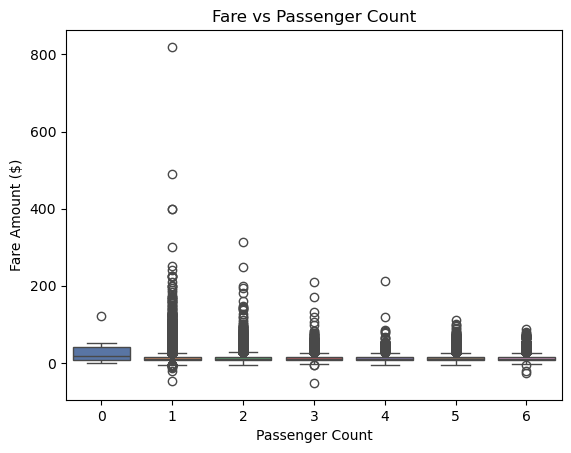

In [476]:
# 2. Fare vs passenger count

sns.boxplot(
    x='passenger_count', y='fare_amount',
    data=original_data, palette='deep'
)
plt.title('Fare vs Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.show()


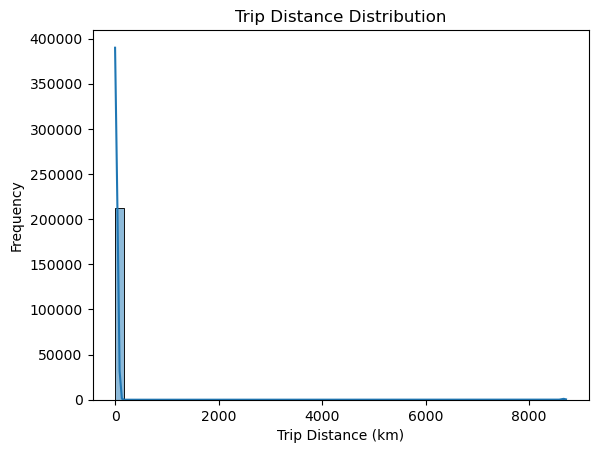

In [480]:
# 3. Trip Distance Distribution

sns.histplot(original_data['trip_distance'], bins=50, kde=True)
plt.title('Trip Distance Distribution')
plt.xlabel('Trip Distance (km)')
plt.ylabel('Frequency')
plt.show()



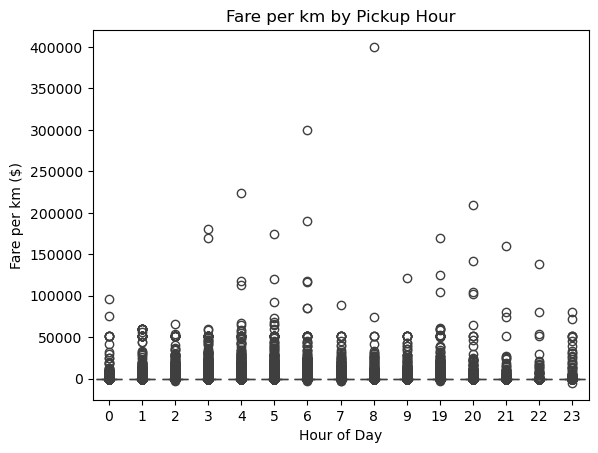

In [482]:
# 4. Fare/Km by Pickup Hour

sns.boxplot(x='pickup_hour', y='fare_per_km', data=original_data)
plt.title('Fare per km by Pickup Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Fare per km ($)')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_25464\2684135046.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


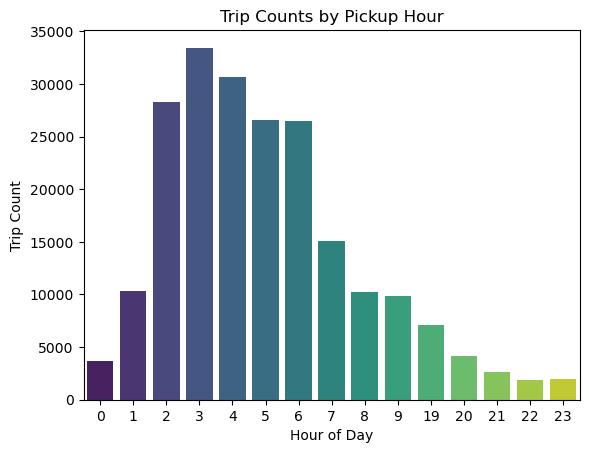

In [488]:
# 5. Trip count by pickup hour

sns.countplot(
    x='pickup_hour', data=original_data,
    palette='viridis'
)
plt.title('Trip Counts by Pickup Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Trip Count')
plt.show()


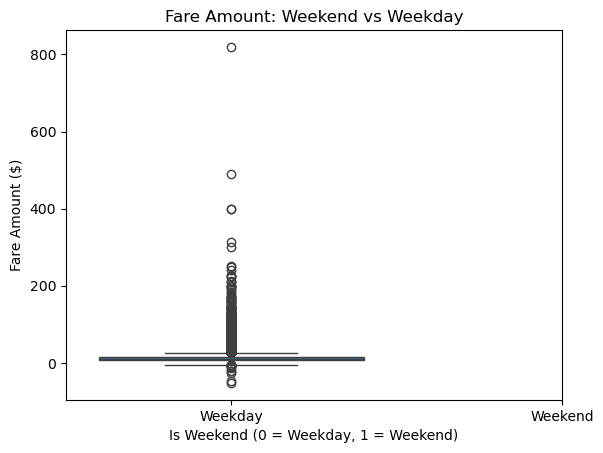

In [492]:
# 6. Weekend vs weekday

sns.boxplot(x='is_weekend', y='fare_amount', data=original_data)
plt.title('Fare Amount: Weekend vs Weekday')
plt.xlabel('Is Weekend (0 = Weekday, 1 = Weekend)')
plt.ylabel('Fare Amount ($)')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.show()


Text(0.5, 1.0, 'Average Fare by Hour of Day')

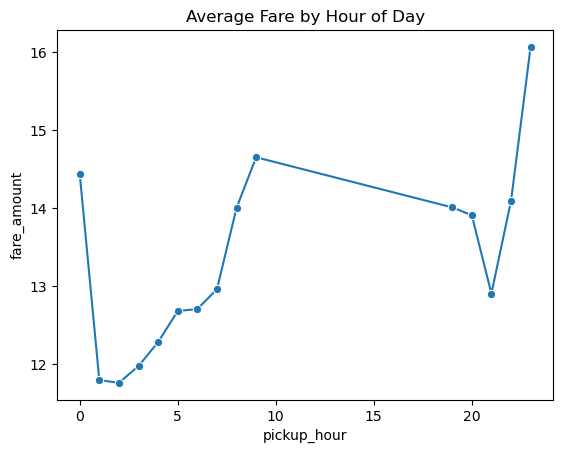

In [496]:
sns.lineplot(
    data=original_data.groupby('pickup_hour')['fare_amount'].mean().reset_index(),
    x='pickup_hour', y='fare_amount', marker='o'
)
plt.title('Average Fare by Hour of Day')


C:\Users\HP\AppData\Local\Temp\ipykernel_25464\421382515.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=original_data, x='pickup_day', palette='pastel')


Text(0.5, 1.0, 'Number of Trips by Day of Week')

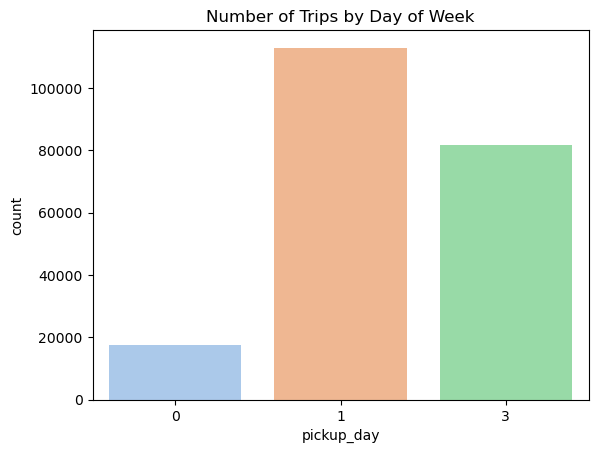

In [498]:
sns.countplot(data=original_data, x='pickup_day', palette='pastel')
plt.title('Number of Trips by Day of Week')


Text(0.5, 1.0, 'Correlation Heatmap')

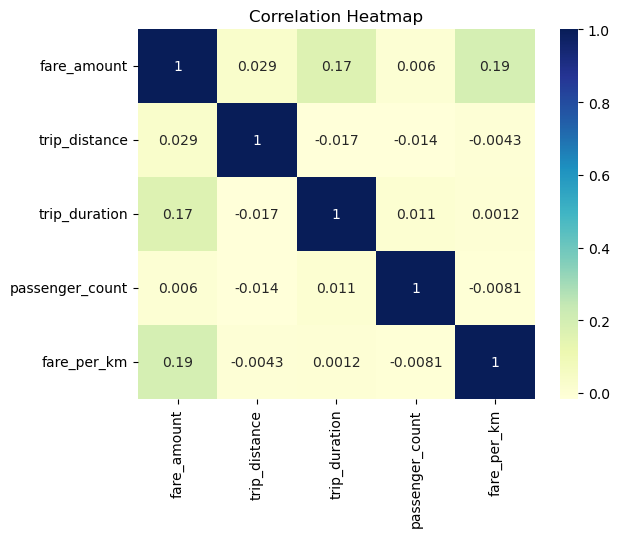

In [508]:
sns.heatmap(original_data[['fare_amount', 'trip_distance', 'trip_duration', 'passenger_count', 'fare_per_km']].corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')


Text(0.5, 1.0, 'Fare Amount Distribution')

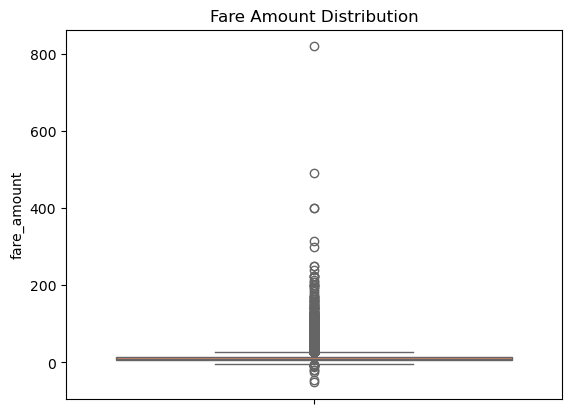

In [510]:
sns.boxplot(data=original_data, y='fare_amount', color='coral')
plt.title('Fare Amount Distribution')


Text(0.5, 1.0, 'Fare vs Trip Distance (Regression Line)')

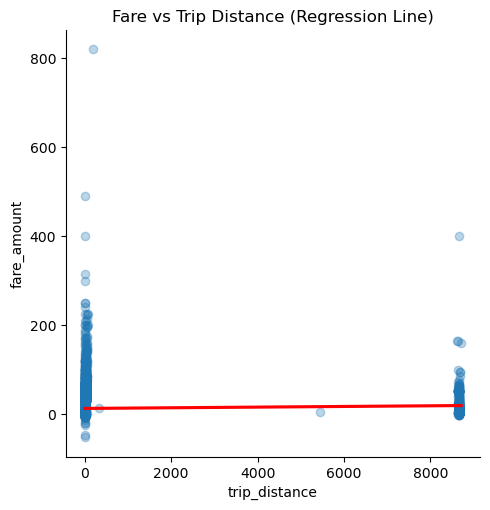

In [512]:
sns.lmplot(data=original_data, x='trip_distance', y='fare_amount', line_kws={"color": "red"}, scatter_kws={"alpha": 0.3})
plt.title('Fare vs Trip Distance (Regression Line)')


# Data Transformation

In [548]:
original_data.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,pickup_day,is_weekend,pickup_hour,am_pm,is_night,is_rush_hour,trip_duration,trip_distance,fare_per_km,tip_percent
0,1,2016-02-29 19:00:00-05:00,2016-02-29 19:07:55-05:00,1,-73.976746,40.765152,1,N,-74.004265,40.746128,...,0,0,19,PM,0,1,7.916667,3.138096,2.867067,22.777752
1,1,2016-02-29 19:00:00-05:00,2016-02-29 19:11:06-05:00,1,-73.983482,40.767925,1,N,-74.005943,40.733166,...,0,0,19,PM,0,1,11.100000,4.303331,2.555565,27.727248
2,2,2016-02-29 19:00:00-05:00,2016-02-29 19:31:06-05:00,2,-73.782021,40.644810,1,N,-73.974541,40.675770,...,0,0,19,PM,0,1,31.100000,16.600142,3.282907,14.678896
3,2,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,...,0,0,19,PM,0,1,0.000000,9.046547,3.481607,11.999996
4,2,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,...,0,0,19,PM,0,1,0.000000,20.400022,4.803681,0.000000


In [552]:
original_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'pickup_day',
       'is_weekend', 'pickup_hour', 'am_pm', 'is_night', 'is_rush_hour',
       'trip_duration', 'trip_distance', 'fare_per_km', 'tip_percent'],
      dtype='object')

In [558]:
# Value Distrubituon  

for i in original_data.columns:
    print(i + " Min and Max: ", original_data[i].min(), " == ", original_data[i].max())


VendorID Min and Max:  1  ==  2
tpep_pickup_datetime Min and Max:  2016-02-29 19:00:00-05:00  ==  2016-03-10 09:55:41-05:00
tpep_dropoff_datetime Min and Max:  2016-02-25 04:45:01-05:00  ==  2016-03-11 09:51:03-05:00
passenger_count Min and Max:  0  ==  6
pickup_longitude Min and Max:  -121.9333267211914  ==  0.0
pickup_latitude Min and Max:  0.0  ==  42.786933898925774
RatecodeID Min and Max:  1  ==  99
store_and_fwd_flag Min and Max:  N  ==  Y
dropoff_longitude Min and Max:  -121.9333267211914  ==  0.0
dropoff_latitude Min and Max:  0.0  ==  42.786933898925774
payment_type Min and Max:  1  ==  4
fare_amount Min and Max:  -52.0  ==  819.5
extra Min and Max:  -0.5  ==  4.5
mta_tax Min and Max:  -0.5  ==  0.5
tip_amount Min and Max:  -2.7  ==  218.95
tolls_amount Min and Max:  0.0  ==  661.08
improvement_surcharge Min and Max:  -0.3  ==  0.3
total_amount Min and Max:  -52.8  ==  832.8
pickup_day Min and Max:  0  ==  3
is_weekend Min and Max:  0  ==  0
pickup_hour Min and Max:  0  ==  23

In [561]:
# column need to be fixed
# fare amount; extra; mta_tax; tip amount; total amount; trip_duration; trip distance; fare_per_km; tip_percent

#am_pm encoding

from sklearn.preprocessing import LabelEncoder

In [569]:
lab_en = LabelEncoder()
original_data['am_pm'] = lab_en.fit_transform( original_data['am_pm'] )

In [571]:
original_data['am_pm']

0         1
1         1
2         1
3         1
4         1
         ..
212340    0
212341    0
212342    0
212343    0
212344    0
Name: am_pm, Length: 212345, dtype: int32

In [573]:
# remove 0 in passenger count

original_data = original_data[original_data['passenger_count'] > 0]


In [577]:
original_data['passenger_count'].unique()

array([1, 2, 3, 5, 6, 4], dtype=int64)

In [629]:
# NYC coordoinates
original_data = filter_nyc_coordinates(original_data)

def filter_nyc_coordinates(original_data):
    original_data = original_data[
        (original_data['pickup_latitude'].between(40.5, 41.0)) &
        (original_data['dropoff_latitude'].between(40.5, 41.0)) &
        (original_data['pickup_longitude'].between(-74.3, -73.7)) &
        (original_data['dropoff_longitude'].between(-74.3, -73.7))
    ]
    return original_data


In [603]:
# Remove negative or more than 1440mins duration

original_data = original_data[original_data['trip_duration'].between(1, 1440)]


In [749]:
# reasonable trip distance

original_data = original_data[(original_data['trip_distance'] >= 0.5) & (original_data['trip_distance'] <= 100)]


In [683]:
print(original_data['trip_distance'].min(), '==', original_data['trip_distance'].max())


0.5000135418013599 == 42.952078439016105


In [701]:
# Fix Negative values in amount

original_data = original_data[original_data['fare_amount'] > 0]
original_data = original_data[original_data['total_amount'] > 0]
original_data = original_data[original_data['tip_amount'] >= 0]
original_data = original_data[(original_data['tip_percent'] >= 0) & (original_data['tip_percent'] <= 100)]
original_data = original_data[original_data['extra'] > 0]
original_data = original_data[original_data['mta_tax'] > 0]
original_data = original_data[original_data['improvement_surcharge'] > 0]

In [647]:
original_data['RatecodeID'].unique()

array([ 1,  2,  5,  3,  4, 99], dtype=int64)

In [921]:
original_data['RatecodeID'].mode()

0    1
Name: RatecodeID, dtype: int64

In [923]:
print(original_data['RatecodeID'].value_counts())

RatecodeID
1    18897
4        8
Name: count, dtype: int64


In [925]:
original_data['RatecodeID'] = original_data['RatecodeID'].replace(99, 1)

In [927]:
original_data['RatecodeID'].unique()

array([1, 4], dtype=int64)

In [695]:
# recalculate fare_per_km

original_data['fare_per_km'] = original_data['fare_amount'] / original_data['trip_distance']

original_data = original_data[
    (original_data['fare_per_km'] >= 1) & 
    (original_data['fare_per_km'] <= 100)
]


In [697]:
original_data['fare_per_km'].min(), " == ", original_data['fare_per_km'].max()

(1.0313001620028603, ' == ', 97.48997053082822)

# # Value Distrubituon after filtering Reasonable data

In [707]:


for i in original_data.columns:
    print(i + " Min and Max: ", original_data[i].min(), " == ", original_data[i].max())


VendorID Min and Max:  1  ==  2
tpep_pickup_datetime Min and Max:  2016-02-29 19:00:00-05:00  ==  2016-03-10 09:53:20-05:00
tpep_dropoff_datetime Min and Max:  2016-02-29 19:02:03-05:00  ==  2016-03-11 09:13:32-05:00
passenger_count Min and Max:  1  ==  6
pickup_longitude Min and Max:  -74.03108978271484  ==  -73.7366714477539
pickup_latitude Min and Max:  40.57721328735352  ==  40.87375259399414
RatecodeID Min and Max:  1  ==  4
store_and_fwd_flag Min and Max:  N  ==  Y
dropoff_longitude Min and Max:  -74.2928695678711  ==  -73.70040130615233
dropoff_latitude Min and Max:  40.55844879150391  ==  40.91985702514648
payment_type Min and Max:  1  ==  4
fare_amount Min and Max:  2.5  ==  92.5
extra Min and Max:  0.5  ==  1.0
mta_tax Min and Max:  0.5  ==  0.5
tip_amount Min and Max:  0.0  ==  20.0
tolls_amount Min and Max:  0.0  ==  16.62
improvement_surcharge Min and Max:  0.3  ==  0.3
total_amount Min and Max:  3.8  ==  104.88
pickup_day Min and Max:  0  ==  3
is_weekend Min and Max:  0 

In [751]:
# SKewness

numerical_cols = ['trip_distance', 'trip_duration', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 
                  'tolls_amount', 'improvement_surcharge', 'fare_per_km', 'tip_percent', 'pickup_hour']
skewness = original_data[numerical_cols].skew().sort_values(ascending=False)
skewness

extra                    25.045315
tolls_amount              5.450468
fare_per_km               1.024213
trip_duration             0.707993
fare_amount               0.496142
trip_distance             0.422547
tip_amount                0.411088
mta_tax                   0.000000
improvement_surcharge     0.000000
tip_percent              -0.212672
pickup_hour              -1.714777
dtype: float64

In [ ]:
# Apply log transform to positive skew cols

In [718]:

# Columns that are positively skewed
pos_skewed_cols = ['trip_distance', 'trip_duration', 'fare_amount', 'extra', 'tip_amount', 
                  'tolls_amount', 'fare_per_km', 'tip_percent']

# Apply log transformation to positively skewed columns

original_data[pos_skewed_cols] = original_data[pos_skewed_cols].apply(lambda x: np.log1p(x))

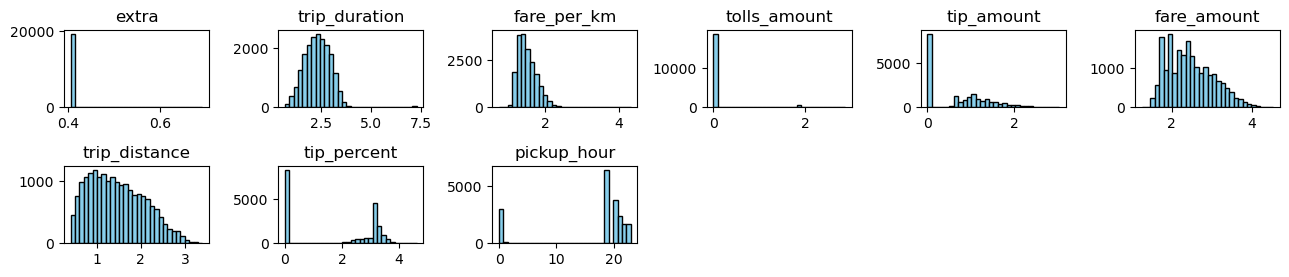

In [726]:
# Re-Run
# Select numerical columns with high skewness (absolute skewness > 0.5)
skewed_cols = skewness[abs(skewness) > 0.5].index

# Plot histograms before transformation
plt.figure(figsize=(13, 4))
for i, col in enumerate(skewed_cols, 1):
    plt.subplot(3, 6, i)  # Adjust grid size as needed
    plt.hist(original_data[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

# Box cox method

In [779]:
from scipy.stats import boxcox
from scipy import stats


In [781]:
# Make a copy of your data (optional)
df_transformed = original_data.copy()

# Your skewed columns
positive_skewed_cols = ['trip_distance', 'trip_duration', 'fare_amount', 'extra', 
                   'tip_amount', 'tolls_amount', 'fare_per_km']

for col in positive_skewed_cols:
    # Ensure all values are positive (Box-Cox needs > 0)
    if (df_transformed[col] <= 0).any():
        print(f"Skipping {col} due to non-positive values")
    else:
        transformed_data, _ = boxcox(df_transformed[col])
        df_transformed[col + '_boxcox'] = transformed_data

Skipping tip_amount due to non-positive values
Skipping tolls_amount due to non-positive values


C:\Users\HP\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1120: UserWarning: The optimal lambda is -1175.2290680712292, but the returned lambda is the constrained optimum to ensure that the maximum or the minimum of the transformed data does not overflow in float64.
  lmax = boxcox_normmax(x, method='mle', optimizer=optimizer)


## Handle Outliers

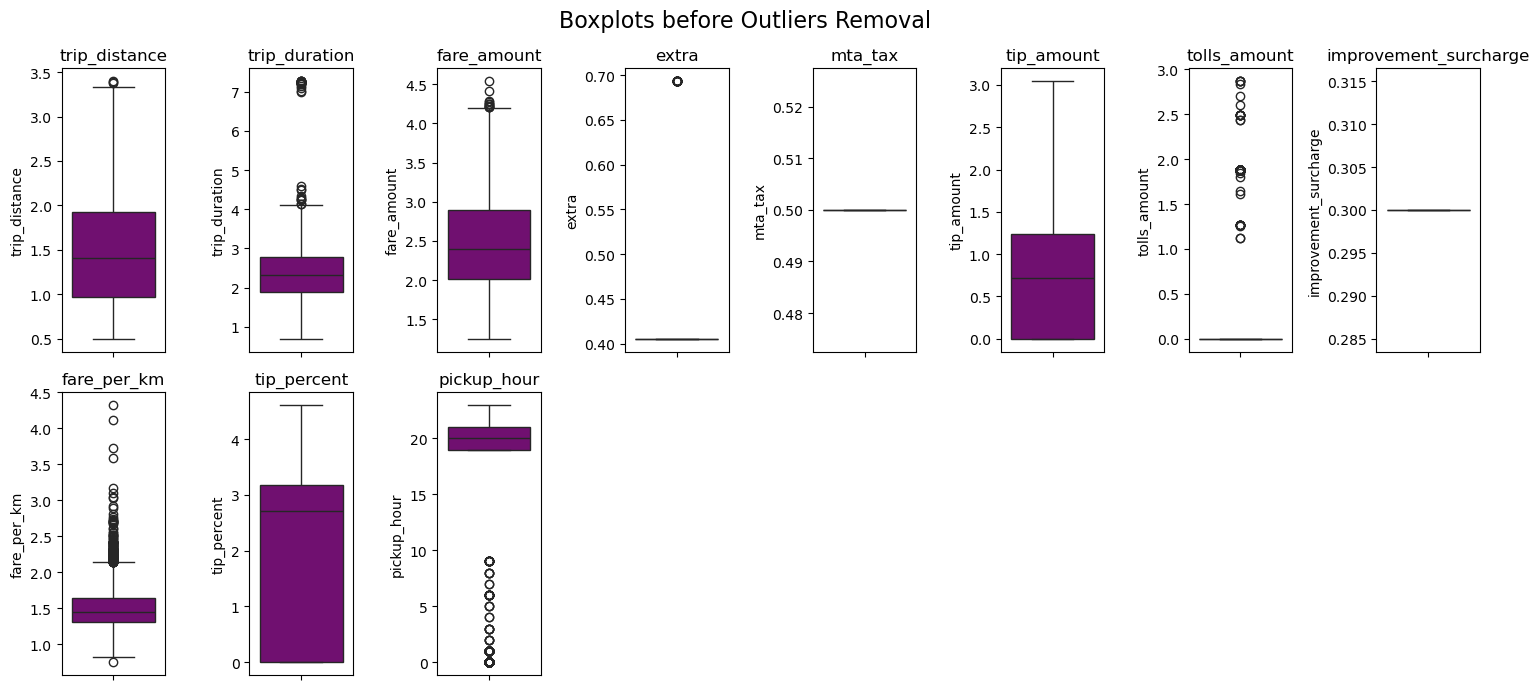

In [769]:
numerical_cols = ['trip_distance', 'trip_duration', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 
                  'tolls_amount', 'improvement_surcharge', 'fare_per_km', 'tip_percent', 'pickup_hour']

# Loop through numerical columns and create boxplots

# Set up the plot
plt.figure(figsize=(15, 7))
plt.suptitle("Boxplots before Outliers Removal", fontsize=16)

for i in range(len(numerical_cols)):
    plt.subplot(2, 8, i+1)  # Use a 3x4 grid for 11 plots
    sns.boxplot(y= original_data[numerical_cols[i]], color='purple')
    plt.title(numerical_cols[i])

plt.tight_layout()
plt.show()


In [787]:
for col in numerical_cols:

    Q1 = original_data[col].quantile(0.25)  # 25th percentile
    Q3 = original_data[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range

    # Define lower and upper bound
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values at lower and upper bound
    original_data[col] = np.where(original_data[col] < lower_bound, lower_bound, original_data[col])
    original_data[col] = np.where(original_data[col] > upper_bound, upper_bound, original_data[col])

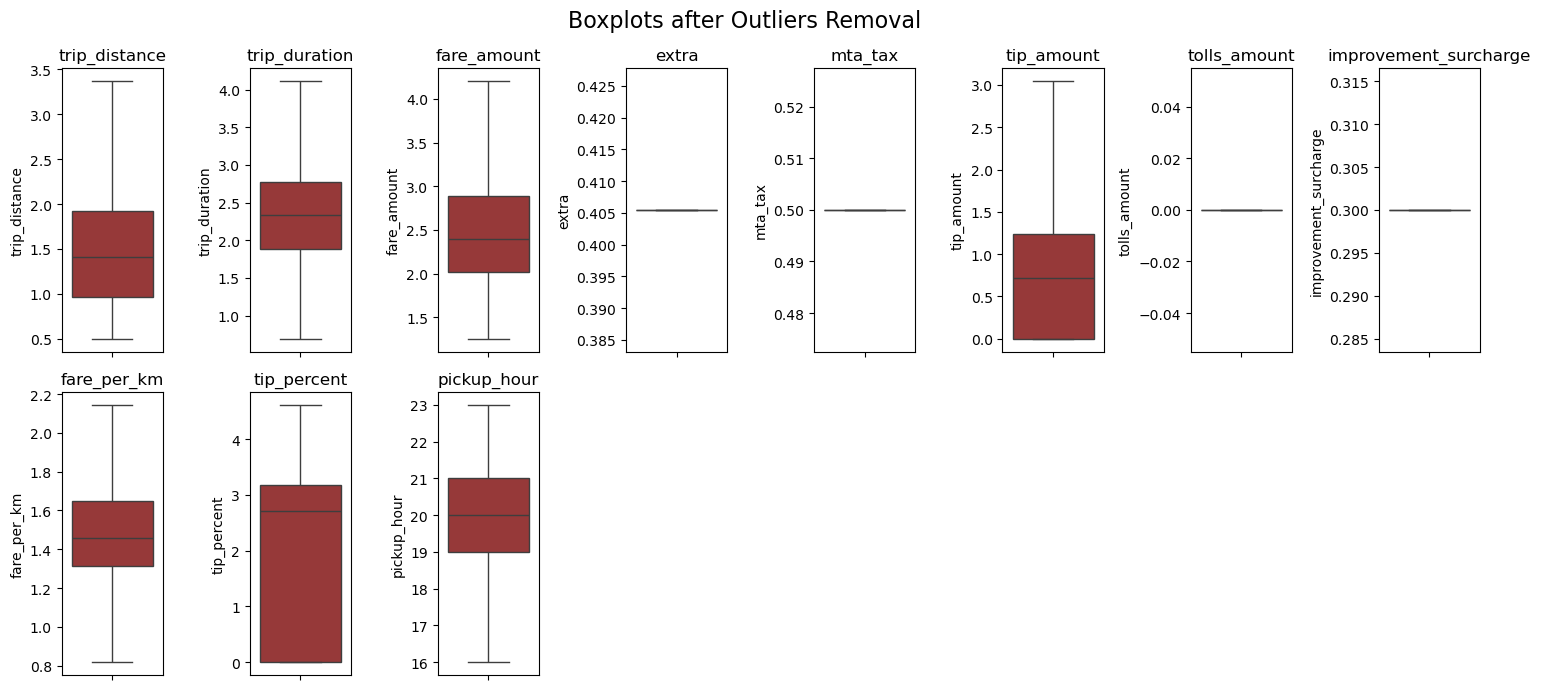

In [789]:
numerical_cols = ['trip_distance', 'trip_duration', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 
                  'tolls_amount', 'improvement_surcharge', 'fare_per_km', 'tip_percent', 'pickup_hour']

# Loop through numerical columns and create boxplots

# Set up the plot
plt.figure(figsize=(15, 7))
plt.suptitle("Boxplots after Outliers Removal", fontsize=16)

for i in range(len(numerical_cols)):
    plt.subplot(2, 8, i+1)  # Use a 3x4 grid for 11 plots
    sns.boxplot(y= original_data[numerical_cols[i]], color='brown')
    plt.title(numerical_cols[i])

plt.tight_layout()
plt.show()


In [793]:
from sklearn.preprocessing import OneHotEncoder

In [901]:
# Remove duplicated columns by name
original_data = original_data.loc[:, ~original_data.columns.duplicated()]


In [909]:
# Drop all columns that start with a known prefix from get_dummies
original_data = original_data.drop(columns=[col for col in original_data.columns if col.startswith('RatecodeID') 
                      or col.startswith('store_and_fwd_flag') 
                      or col.startswith('payment_type')])


In [911]:
original_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'pickup_day', 'is_weekend', 'pickup_hour', 'am_pm',
       'is_night', 'is_rush_hour', 'trip_duration', 'trip_distance',
       'fare_per_km', 'tip_percent'],
      dtype='object')

In [913]:
categorical_cols = ['RatecodeID', 'store_and_fwd_flag', 'payment_type']

In [915]:
original_cats = df_transformed[categorical_cols]
original_data = pd.concat([original_data, original_cats], axis=1)

In [917]:
original_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'pickup_day', 'is_weekend', 'pickup_hour', 'am_pm',
       'is_night', 'is_rush_hour', 'trip_duration', 'trip_distance',
       'fare_per_km', 'tip_percent', 'RatecodeID', 'store_and_fwd_flag',
       'payment_type'],
      dtype='object')

In [919]:
original_data['store_and_fwd_flag'] = original_data['store_and_fwd_flag'].map({'N': 0, 'Y': 1})


# One Hot Encoding

In [929]:
ratecode_dummies = pd.get_dummies(original_data['RatecodeID'], prefix='RatecodeID').astype(int)
original_data = pd.concat([original_data.drop('RatecodeID', axis=1), ratecode_dummies], axis=1)


In [937]:
payment_dummies = pd.get_dummies(original_data['payment_type'], prefix='payment_type').astype(int)
original_data = pd.concat([original_data.drop('payment_type', axis=1), payment_dummies], axis=1)


In [939]:
original_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'pickup_day', 'is_weekend', 'pickup_hour', 'am_pm',
       'is_night', 'is_rush_hour', 'trip_duration', 'trip_distance',
       'fare_per_km', 'tip_percent', 'store_and_fwd_flag', 'RatecodeID_1',
       'RatecodeID_4', 'payment_type_1', 'payment_type_2', 'payment_type_3',
       'payment_type_4'],
      dtype='object')

# Feature Selection

In [945]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_percentage_error

from scipy import stats

from sklearn.preprocessing import StandardScaler

In [967]:
selected_cols = ['trip_duration', 'trip_distance','fare_amount', 'tip_amount', 'total_amount', 'pickup_day',  
                 'pickup_hour','is_night', 'is_rush_hour', 'fare_per_km', 'tip_percent', 'store_and_fwd_flag', 'RatecodeID_1', 
                 'RatecodeID_4', 'payment_type_1', 'payment_type_2', 'payment_type_3','payment_type_4']

<Axes: >

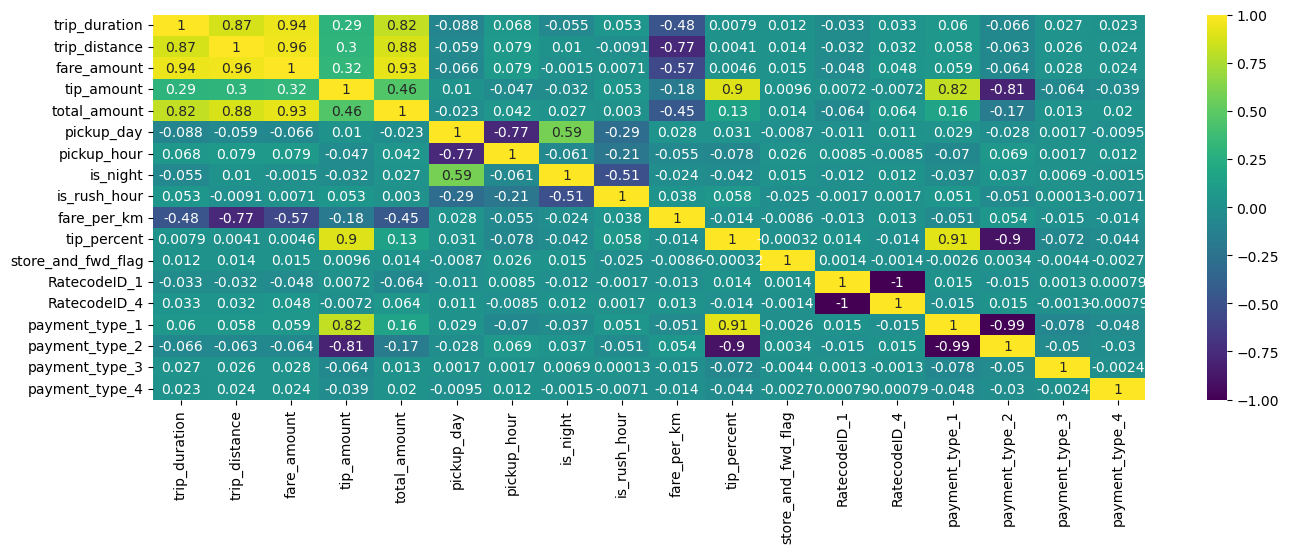

In [969]:
 # Stats

corr = original_data[selected_cols].corr()

plt.figure(figsize=(16, 5))

sns.heatmap(corr, annot= True, cmap="viridis")

<Axes: >

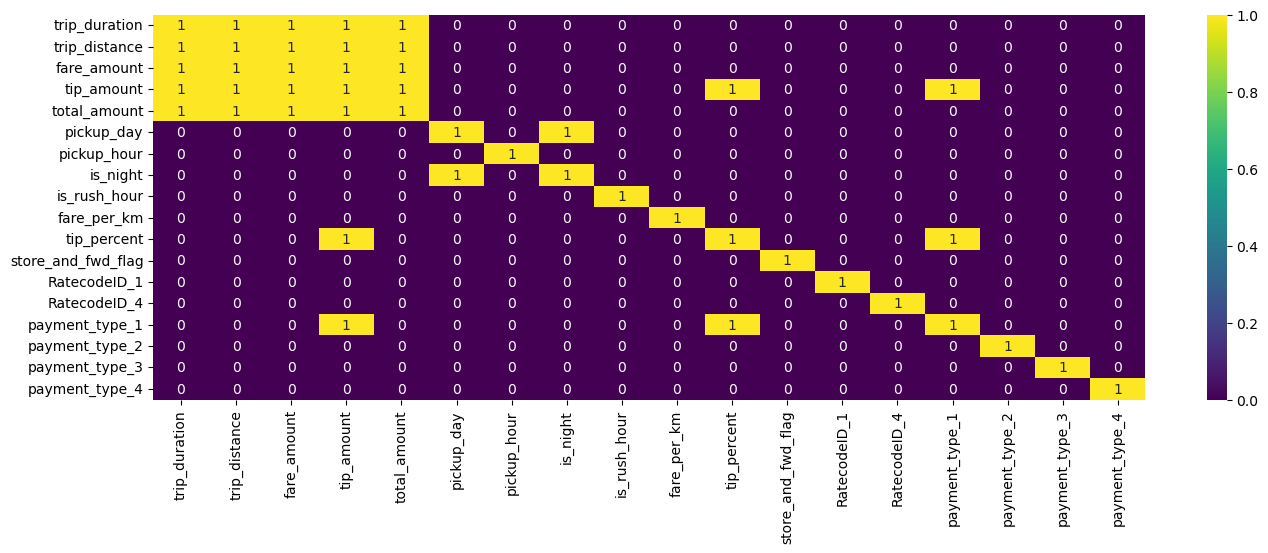

In [971]:
plt.figure(figsize=(16, 5))

sns.heatmap(corr >= 0.20, annot= True, cmap="viridis")

In [1021]:
!pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
    --------------------------------------- 2.6/150.0 MB 13.7 MB/s eta 0:00:11
   - -------------------------------------- 6.6/150.0 MB 16.8 MB/s eta 0:00:09
   -- ------------------------------------- 11.0/150.0 MB 18.1 MB/s eta 0:00:08
   --- ------------------------------------ 14.9/150.0 MB 18.8 MB/s eta 0:00:08
   ----- ---------------------------------- 20.2/150.0 MB 19.9 MB/s eta 0:00:07
   ------ --------------------------------- 26.2/150.0 MB 21.6 MB/s eta 0:00:06
   -------- ------------------------------- 31.5/150.0 MB 22.2 MB/s eta 0:00:06
   --------- ------------------------------ 37.0/150.0 MB 22.8 MB/s eta 0:00:05
   ----------- ---------------------------- 43.0/150.0 MB 23.6 MB/s eta 0:00:05
   ------------ --------------------------- 47.7/150.0 MB 23.4 MB/s eta 0:00:05
   ------------- -------------------------- 52.4/150.0 MB 23.5 MB/s eta 0:00:05
   --------------- ------------------------ 57.4/15

In [1025]:

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.feature_selection import chi2, SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")



In [1048]:
feature_cols = ['trip_duration', 'trip_distance', 'total_amount', 'pickup_hour','is_night', 'fare_per_km']

In [1050]:
tar = original_data['total_amount']

val = original_data[feature_cols].drop('total_amount', axis=1)

## ANOVA

In [1053]:
# Apply ANOVA F-test
anova_selector = SelectKBest(score_func=f_regression, k='all')
anova_selector.fit(val, tar)

SelectKBest(k='all', score_func=<function f_regression at 0x000001DCF1224D60>)

In [1055]:
# Show scores
anova_scores = pd.DataFrame({
    'Feature': val.columns,
    'F_Score': anova_selector.scores_
}).sort_values(by='F_Score', ascending=False)

display(anova_scores)

,Feature,F_Score
1,trip_distance,62299.622030
0,trip_duration,37738.019638
4,fare_per_km,4759.512487
2,pickup_hour,32.635500
3,is_night,13.481015


## Random Forest

In [1057]:
model = RandomForestRegressor(n_estimators = 200, random_state=42)
model.fit(val, tar)

importances = model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': val.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

display(feature_importance)


,Feature,Importance
1,trip_distance,0.781918
0,trip_duration,0.140622
4,fare_per_km,0.071831
2,pickup_hour,0.004409
3,is_night,0.001220


# Model Building

In [1062]:
# Function to calculate performance metrics


def reg_performance(actual, pred):
    mse = mean_squared_error(actual, pred) 
    rmse = np.sqrt(mse) # root_mean_squared_error(actual, pred) 
    mae = mean_absolute_error(actual, pred) 
    mape = mean_absolute_percentage_error(actual, pred)
    r2 = r2_score(actual, pred)
    return pd.DataFrame({
        "R2" : [r2],
        "MSE": [mse],
        "RMSE": [rmse],
        "MAE": [mae],
        "MAPE": [mape],
    })

# Split data into train and test data

trdata, tsdata, trlab, tslab = train_test_split(val, tar, test_size= 0.20, random_state= 77)

# Initialize models
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "XGBoost Regressor": XGBRegressor()
}

# Evaluate
results = []

for name, model in models.items():
    model.fit(trdata, trlab) # Train model on training data
    pred = model.predict(tsdata) # Predict on test data
    metrics_df = reg_performance(tslab, pred)
    
    results.append([name] + metrics_df.iloc[0].tolist()) # Store results

# Display results as Dataframe
results_df = pd.DataFrame(results, columns=['Model', 'R2 Score', 'MSE', 'RMSE', 'MAE', 'MAPE'])
results_df = results_df.sort_values(by="R2 Score", ascending=False)

display(results_df)


,Model,R2 Score,MSE,RMSE,MAE,MAPE
4,GradientBoosting,0.952316,5.254253,2.292216,1.566324,0.097797
3,RandomForest,0.951060,5.392681,2.322215,1.534996,0.094889
6,XGBoost Regressor,0.947643,5.769229,2.401922,1.542443,0.094316
0,LinearRegression,0.905661,10.395176,3.224155,2.189224,0.156886
1,Ridge,0.905604,10.401543,3.225142,2.185677,0.156322
5,Decision Tree Regressor,0.905585,10.403612,3.225463,1.897278,0.115792
2,Lasso,0.751165,27.419130,5.236328,3.218833,0.200459


# Hyperparameter Tuning

In [1064]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3],
    'subsample': [0.8, 1.0]
}

# Create the model
gbr = GradientBoostingRegressor(random_state=42)

# Create the GridSearch
grid_search = GridSearchCV(  estimator=gbr,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,   # uses all CPU cores for faster computation
    verbose=2)

# Fit on training data
grid_search.fit(trdata, trlab)

# Best parameters and score
print("Best Parameters:\n", grid_search.best_params_)
print("Best R2 Score (CV):", grid_search.best_score_)

# Final model prediction and performance on test set
best_gbr = grid_search.best_estimator_
final_pred = best_gbr.predict(tsdata)

# Performance report
final_metrics = reg_performance(tslab, final_pred)
display(final_metrics)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters:
 {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300, 'subsample': 0.8}
Best R2 Score (CV): 0.9544897728129327


,R2,MSE,RMSE,MAE,MAPE
0,0.955393,4.915261,2.217039,1.501556,0.093631


In [1066]:
# save the Model

import pickle

In [1068]:

with open('best_gbr_model.pkl', 'wb') as file:
    pickle.dump(best_gbr, file)


In [1070]:
# Load the model

with open('best_gbr_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [1076]:
# Predict using loaded model

prediction = loaded_model.predict(tsdata)
